# Individual Plan
###### github link: https://github.com/anitazou910/DSCI100-Individual-Plan.git
## Importing data

In [1]:
library(tidyverse)
players <- read_csv("players.csv")
head(players)
sessions <- read_csv("sessions.csv")
head(sessions)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.72e+12,1.72e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.72e+12,1.72e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72e+12,1.72e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72e+12,1.72e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.72e+12,1.72e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.72e+12,1.72e+12


## Data Description
#### Players dataset:
##### There are 196 observations and 9 variables in players, the variables are:  
+ `experience`: charactor, indicates the player's experience level, includes `Amateur`, `Beginner`, `Regular`,`Pro`,`Veteran`
+ `subscribe`: logical, indicates wether or not the player has suscribed the game information, inludes`True`,`False`
+ `hashedEmail`: charactor, indicates the hashing encoded email addresses of players
+ `played_hours`: double, indicates player hours
+ `name`: charactor, indicates the player's name
+ `gender`: charactor, indicates the player's gender
+ `Age`: double, indicates the player's age

#### Sessions dataset:
##### There are 1535 observations and 5 variables in sessions, the variables are:
+ `hashedEmail`:characator, indicates the hashing encoded email addresses of players
+ `start_time`: charactor,indicates start time of the game session of players
+ `end_time`: charactor, indicates end time of the game session of players
+ `original_start_time`: double,numerical version of the start timestamp
+ `original_end_time`: double,numerical version of the end timestamp

#### Potential Issues:
##### For players:

In [2]:
players |>
    group_by(gender) |>
    summarize(count=n())

gender,count
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


In [19]:
players |>
  filter(played_hours==0) |>
  count()

n
<int>
85


+ According to the table, we can see that the number of other categories, which are `Agender`, `Other`, `Two-Spirited`, is much smaller compared to the number of female and male. We can group these catogries together.
+ There are 85 sets of data where playtime=0. We can delete these data.

##### For sessions:

In [4]:
colSums(is.na(sessions))

hashedEmail          start_time            end_time original_start_time 
                  0                   0                   2                   0 
  original_end_time 
                  2

+ There are missing values in endtime, which may indicate incomplete playing sessions.
+ The timestamp value appears to be stored in UNIX milliseconds (e.g., `1.72e+12`), which can be converted to a readable date-time format for further analysis.

## Data Visualisation

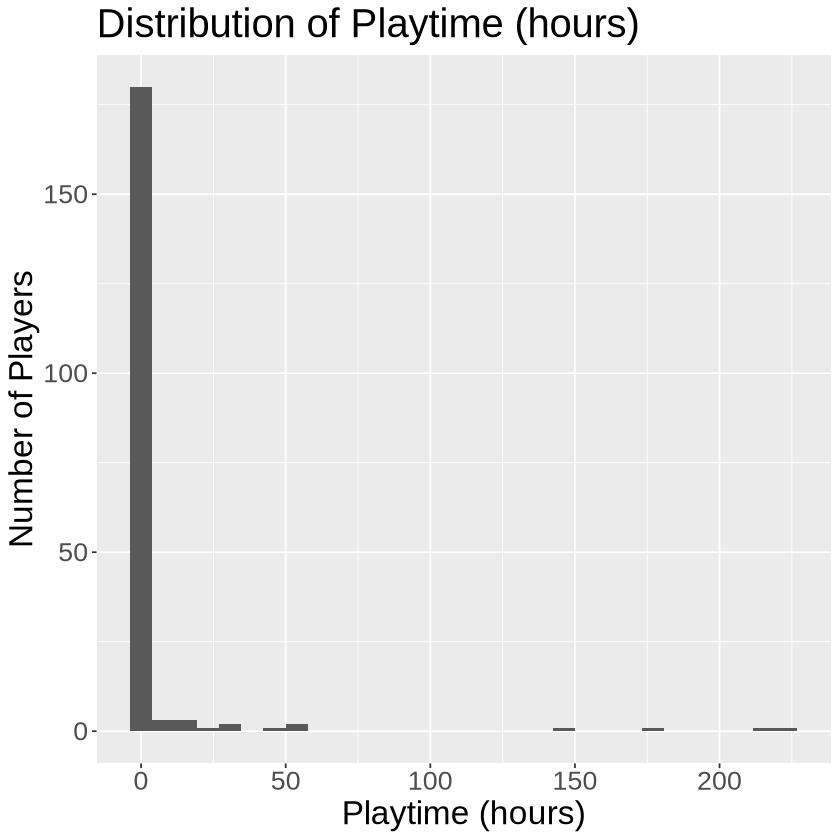

In [13]:
playtime_hist <- ggplot(players, aes(x = played_hours)) +
  geom_histogram(bins = 30) +
  labs(title = "Distribution of Playtime (hours)",
       x = "Playtime (hours)",
       y = "Number of Players") +
  theme(text = element_text(size = 20))
playtime_hist

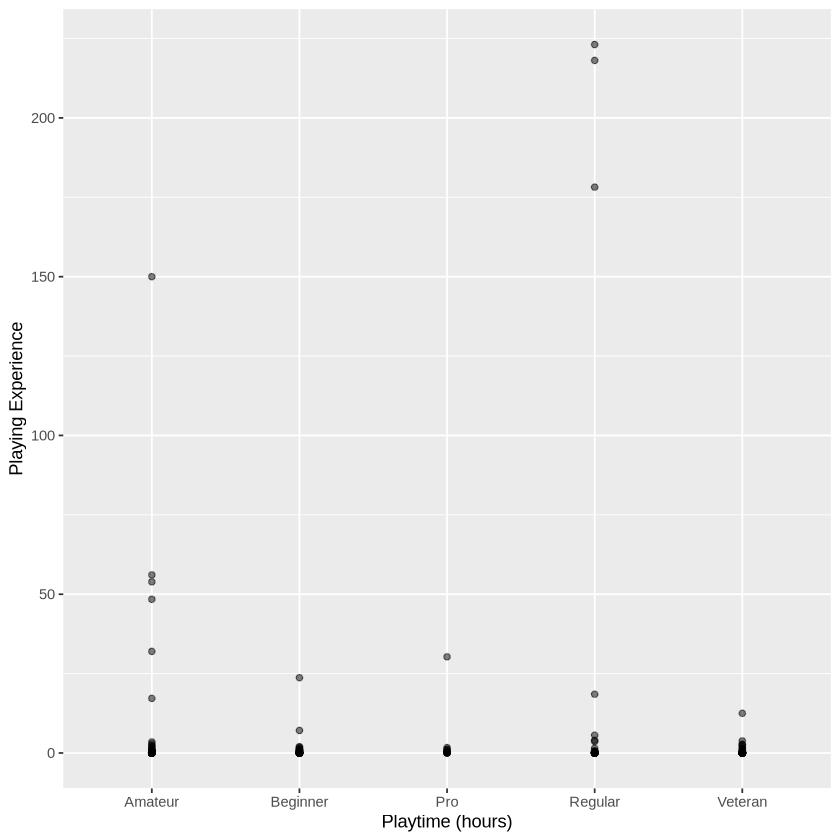

In [25]:
ggplot(players, aes(x = experience, y = played_hours)) +
  geom_point(alpha = 0.5) +
  labs(x = "Playtime (hours)", y = "Playing Experience")

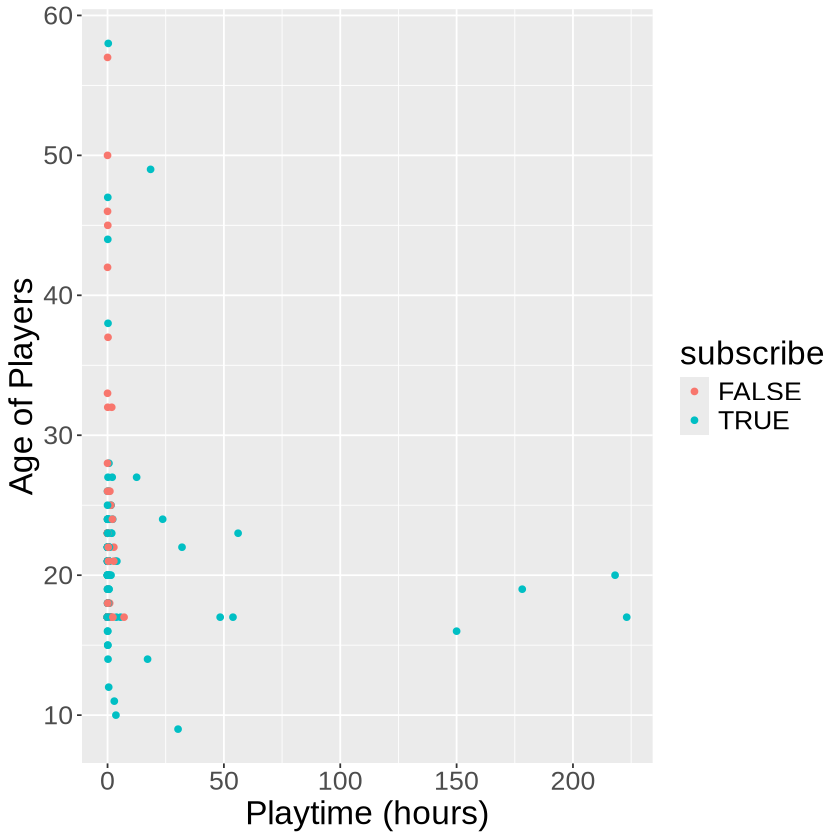

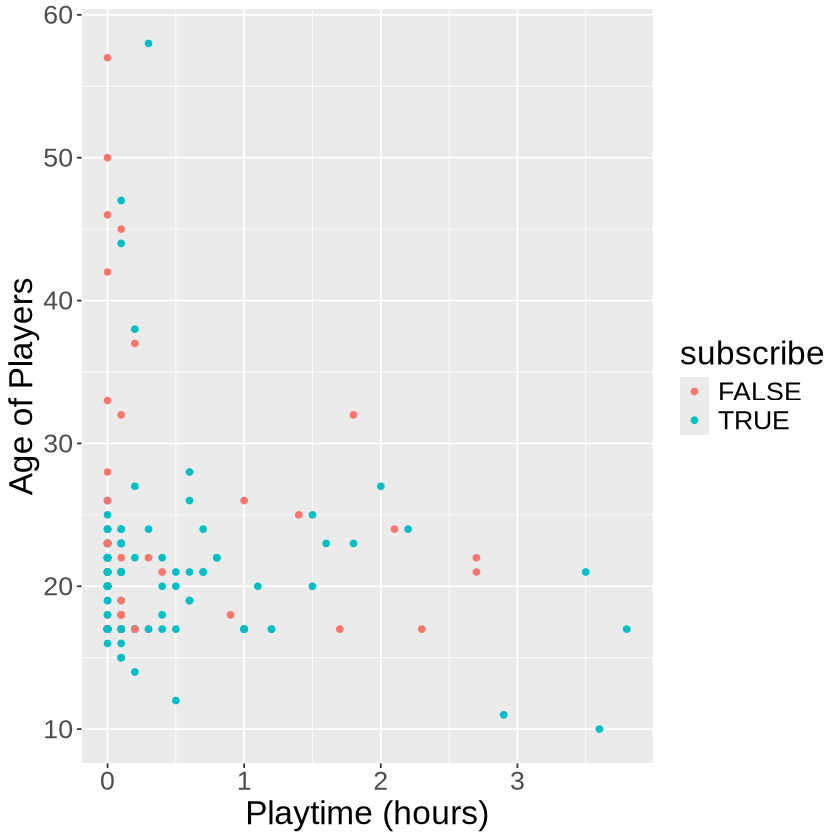

In [35]:
ggplot(players, aes(x = played_hours, y = Age)) +
  geom_point(aes(color = subscribe), na.rm = TRUE) +
  labs(x = "Playtime (hours)", y = "Age of Players") +
  theme(text = element_text(size = 20))

players_fil <- players |>
  filter(played_hours < 4)
ggplot(players_fil, aes(x = played_hours, y = Age)) +
  geom_point(aes(color = subscribe), na.rm = TRUE) +
  labs(x = "Playtime (hours)", y = "Age of Players") +
  theme(text = element_text(size = 20))

In [36]:
players |>
  group_by(gender) |>
  summarize(min = min(played_hours), max = max(played_hours), avg = mean(played_hours))

gender,min,max,avg
<chr>,<dbl>,<dbl>,<dbl>
Agender,0.0,12.5,6.25000000
Female,0.0,178.2,10.63513514
Male,0.0,223.1,4.12741935
Non-binary,0.0,218.1,14.88000000
Other,0.2,0.2,0.20000000
Prefer not to say,0.0,2.0,0.37272727
Two-Spirited,0.0,0.4,0.08333333
